In [1]:
import pandas as pd
from scipy import stats
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

import warnings
# Suppress specific warning
warnings.filterwarnings('ignore', category=FutureWarning)

# Exploratory Data Analysis (EDA)
### Key Observations:

#### Financial Attributes
- **Columns**: `yearly_income`, `per_capita_income`, and `total_debt` Currently stored as strings with `$`, require cleaning and conversion.
- credit_score: Numerical measure of creditworthiness.

#### Demographics
- Includes:
  - `age`
  - `retirement_plans`
  - `gender`
  - Geographic data (`latitude`, `longitude`)

### General Observations
  - No missing values and No duplicates found.Contains 2,000 entries 
  - Contains **2,000 entries** with details such as:
    - `yearly_income`
    - `credit_score`
    - `gender`
    - `num_credit_cards`


In [2]:
# Load the datasets
users_data_path = './data/users_data.csv'

users_data = pd.read_csv(users_data_path)

# Display the first few rows of each dataset
users_data_preview = users_data.head()
users_data_info = users_data.info()

users_data_preview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [3]:
if users_data.duplicated().any():
    print("Duplicate rows exists in the users_data.")
    print("\nDuplicate rows:")
    print(df[df.duplicated()])
else:
    print("No duplicate rows in the users_data.")

No duplicate rows in the users_data.


## EDA : Pre Processing Financial Attributes
- Converted financial fields `yearly_income`, `per_capita_income`, and `total_debt` to numeric (float)

In [4]:
# Clean and preprocess data
data_cleaned = users_data.copy()

# Remove non-numeric characters from financial columns and convert to numeric
financial_columns = ['per_capita_income', 'yearly_income', 'total_debt']
for col in financial_columns:
    data_cleaned[col] = data_cleaned[col].replace('[\$,]', '', regex=True).astype(float)

data_cleaned.head(5)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,29278.0,59696.0,127613.0,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,37891.0,77254.0,191349.0,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145.0,249925.0,202328.0,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,53797.0,109687.0,183855.0,675,1


## EDA : Descriptive Statistics 

## Numerical Columns Summary
- **Current Age**: Mean is 45.4, with a range of 18 to 101.
  
- **Retirement Age**: Mean is 66.2, mostly centered around typical retirement ages (65-68).
  
- **Credit Score**: Mean is 709.7, with a standard deviation of 67.2, ranging from 480 to 850.
  
- **Per Capita Income**: Highly variable, ranging from $163 to $145,000 with a mean of $23,142.
  
- **Yearly Income**: Mean is $45,715, with significant variance.
  
- **Total Debt**: Ranges widely, with a mean of $63,709. 

  
## Categorical Columns Summary
- **Gender**: 
  - Roughly balanced, with "Female" being slightly more frequent.
- **Address**: 
  - Mostly unique entries, indicating a diverse user base.

In [5]:
# Summary statistics
summary_stats = data_cleaned.describe(include='all').transpose()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
                     count unique                  top  freq       mean  \
id                 2000.0    NaN                  NaN   NaN      999.5   
current_age        2000.0    NaN                  NaN   NaN    45.3915   
retirement_age     2000.0    NaN                  NaN   NaN    66.2375   
birth_year         2000.0    NaN                  NaN   NaN   1973.803   
birth_month        2000.0    NaN                  NaN   NaN      6.439   
gender               2000      2               Female  1016        NaN   
address              2000   1999  506 Washington Lane     2        NaN   
latitude           2000.0    NaN                  NaN   NaN  37.389225   
longitude          2000.0    NaN                  NaN   NaN -91.554765   
per_capita_income  2000.0    NaN                  NaN   NaN  23141.928   
yearly_income      2000.0    NaN                  NaN   NaN  45715.882   
total_debt         2000.0    NaN                  NaN   NaN  63709.694   
credit_score     

## EDA : Univariate Analysis

Below is the univariate analysis for each variable presented in the below histograms and boxplots:

---
### **Current Age:**
- **Distribution**: The age distribution is slightly skewed to right (toward younger ages), with fewer individuals in older age groups.
- **Boxplot**: The boxplot shows an even spread, with the median at the center. There are a few outliers at higher ages.
  
### **Retirement Age:**
- **Distribution**: The histogram displays a normal-like distribution, with most individuals retiring between the ages of 60 to 70, with 65 being a common milestone.The distribution suggests a general societal norm or guideline for retirement.
- **Boxplot**: The retirement age boxplot indicates that most data points fall within a reasonable range, with few outliers at lower retirement ages (below 55) or late (above 75) retirement. 

### **Credit Score:**
- **Distribution**: a slightly left-skewed, symmetric distribution of credit scores. with most scores between 600 and 750, outliers below 600 indicating potential need for financial education, and a smaller group above 800 representing excellent creditworthiness.
- **Boxplot**: The credit score boxplot shows few outliers, with the majority of scores centered around the median.

### **Number of Credit Cards:**
- **Distribution**: The histogram indicates a right-skewed distribution, where most individuals have between 1 to 3 credit cards, with fewer people having higher numbers of credit cards.
- **Boxplot**: Outliers appear for individuals with more than 6 credit cards.
  
### **Number of Credit Cards:**
- **Distribution**: The histogram indicates a right-skewed distribution, where most individuals have between 1 to 3 credit cards, with fewer people having higher numbers of credit cards.
- **Boxplot**: Outliers appear for individuals with more than 6 credit cards.

### **Per Capita Income:**
- **Distribution**: The histogram indicates that per capita income is heavily right-skewed. Most individuals have low per capita income, with a small number of outliers at higher income levels.
- **Boxplot**: The boxplot shows several extreme outliers. The median lies toward the lower end, further supporting skewness.

### **Yearly Income:**
- **Distribution**: Similar to per capita income, yearly income is right-skewed with a concentration of individuals in the lower income range.
- **Boxplot**: There are several significant outliers, with the median positioned closer to the lower range.

### **Total Debt:**
- **Distribution**: The histogram shows a strong right-skew, where most individuals have lower total debt, and only a few individuals hold large debt amounts.
- **Boxplot**: The boxplot highlights many outliers, suggesting a highly dispersed distribution with a long tail.

### **Gender:**
- **Distribution**: The data is roughly balanced, with "Female" being slightly more frequent
---
## Key Observations

- **Income Variables (Per Capita Income, Yearly Income) and Debt**:- These variables show strong right-skewed distributions, indicating income and debt inequality.
  

- **Credit Score**:- The credit score is well-distributed with few outliers, suggesting stability in the creditworthiness of individuals.


- **Age-related Variables (Current Age, Retirement Age)**:- **Current Age**: Somewhat uniformly distributed.- **Retirement Age**: More normally distributed, with most individuals retiring between the ages of 60 to 70.


- **Number of Credit Cards**:- The distribution is skewed, with most individuals holding fewer credit cards.


- **Gender**:- The data is roughly balanced, with "Female" being slightly more frequent.



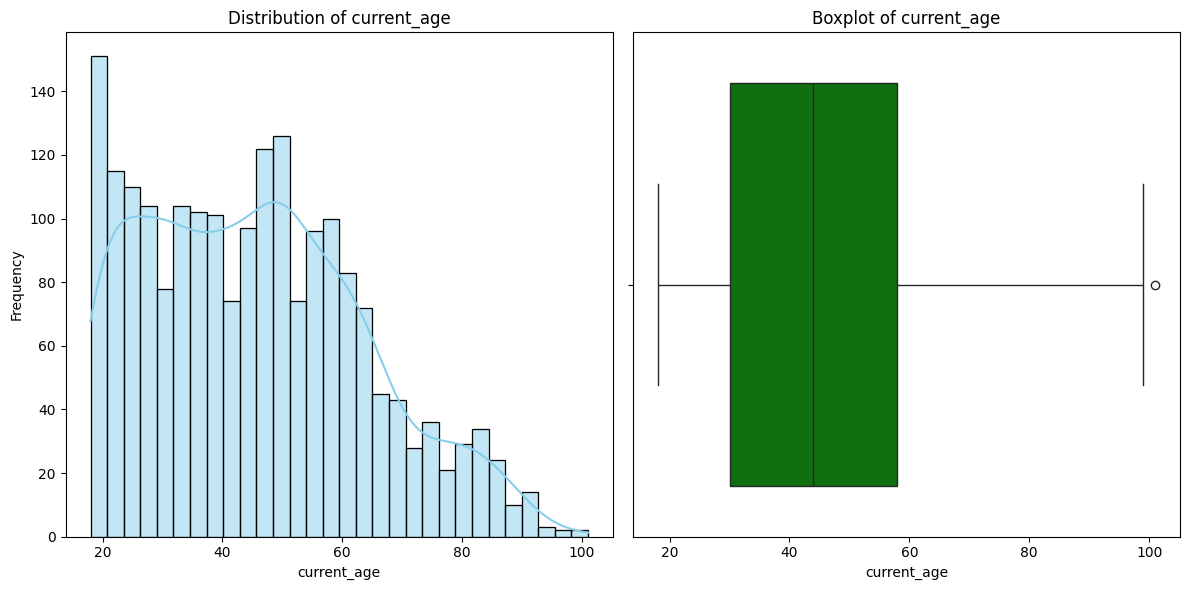

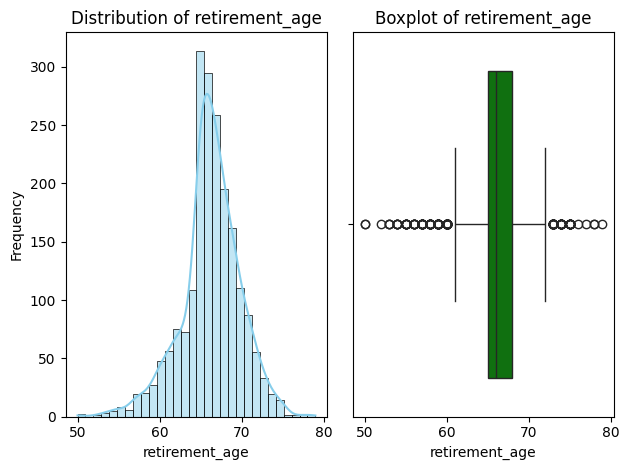

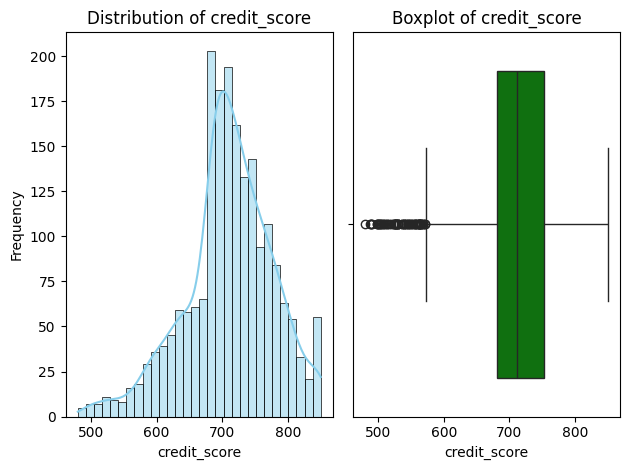

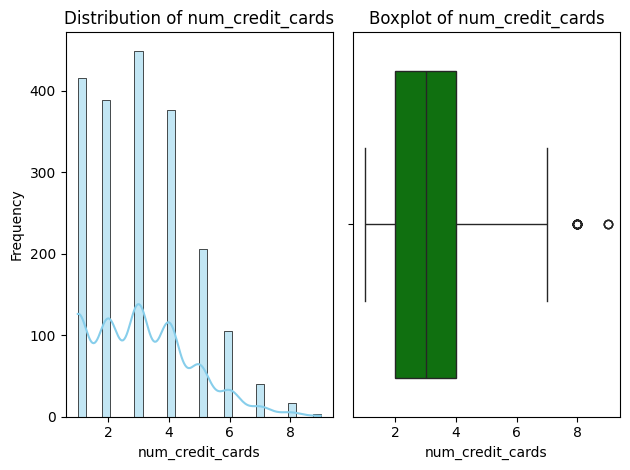

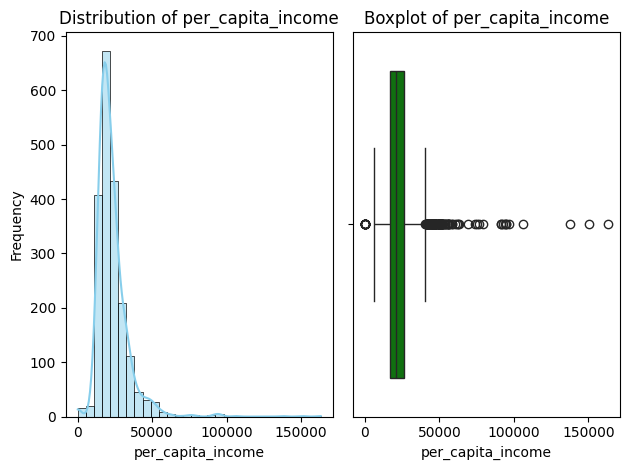

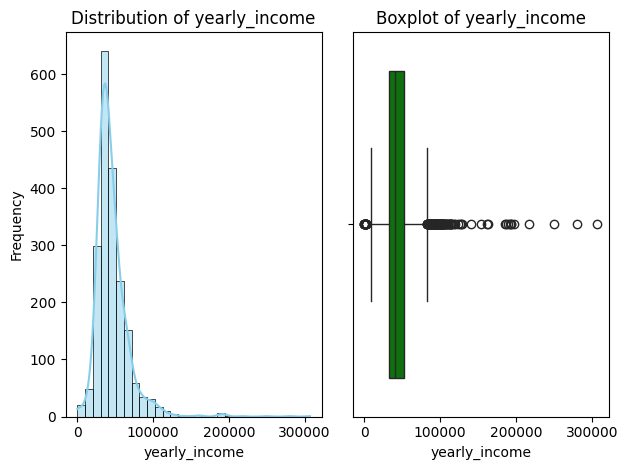

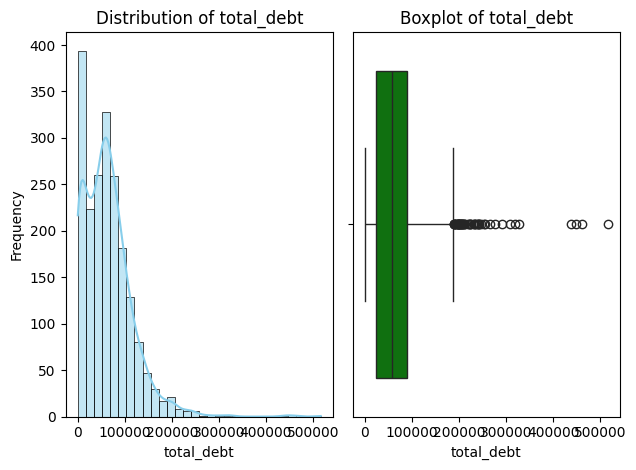

In [6]:
# Numerical columns for analysis
numerical_columns = ['current_age', 'retirement_age', 'credit_score', 'num_credit_cards'] + financial_columns

# Visualize distributions of numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    # Histogram with KDE
    #plt.subplot(3, 3, i)
    plt.subplot(1, 2, 1)
    sns.histplot(data_cleaned[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    # Boxplot
    #plt.subplot(3, 3, i+1)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data_cleaned[col], color='green')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



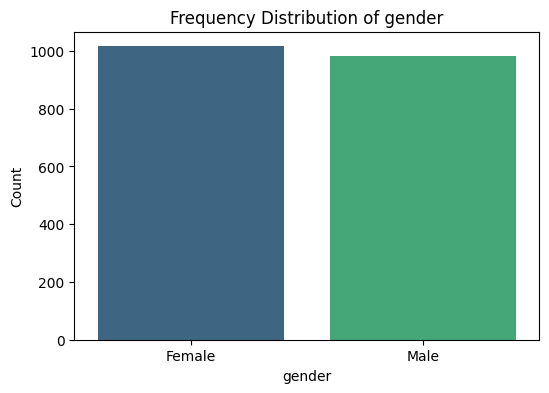

In [7]:
# Analyze categorical data
categorical_columns = ['gender']
for col in categorical_columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data_cleaned[col], palette="viridis")
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

## Correlation Analysis

### **Positive Correlation:**
A high positive value (close to +1) indicates a strong positive relationship. For example:
- **Per Capita Income and Yearly Income**: Correlation of 0.96, suggesting a very strong positive relationship.
- **Yearly Income and Total Debt**: Correlation of 0.55, indicating a moderate positive relationship.
- **Per Capita Income and Total Debt**: Correlation of 0.50, showing a moderate positive relationship.
- **Current Age and Number of Credit Cards**: Correlation of 0.48, showing a moderate positive relationship.

### **Negative Correlation:**
A high negative value (close to -1) indicates a strong negative relationship. For example:
- **Current Age and Total Debt**: Correlation of -0.32, showing a weak to moderate negative relationship.
- **Current Age and Yearly Income**: Correlation of -0.11, indicating a weak negative relationship.

### **Weak or No Correlation:**
Values close to 0 indicate little or no linear relationship. For instance:
- **Credit Score and Per Capita Income**: Correlation of approximately 0 suggests no significant relationship.
- **Retirement Age and Yearly Income**: Correlation of 0.02, indicating little to no relationship.


Number of outliers in per_capita_income: 123
Number of outliers in yearly_income: 118
Number of outliers in total_debt: 51


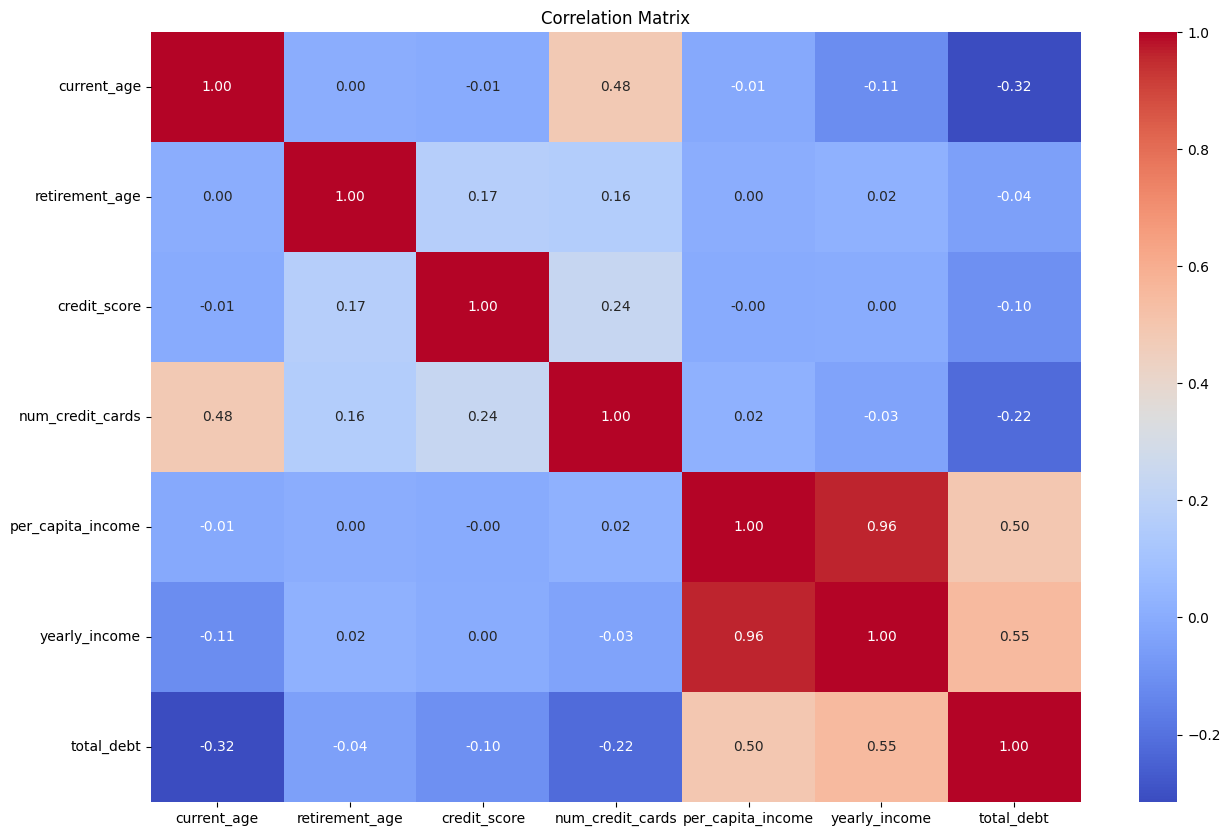

In [8]:
# Handling Outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]



# Detect and print outliers for financial columns
for col in financial_columns:
    outliers = detect_outliers_iqr(data_cleaned, col)
    print(f'Number of outliers in {col}: {len(outliers)}')

# Correlation Analysis
correlation_matrix = data_cleaned[numerical_columns].corr()

# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# yearly_income deep dive

Numerical Insights for Yearly Income:
Mean: 45715.882
Median: 40744.5
Mode: 44128.0
Standard Deviation: 22992.61545631199
Minimum: 1.0
Maximum: 307018.0
IQR: 19880.0


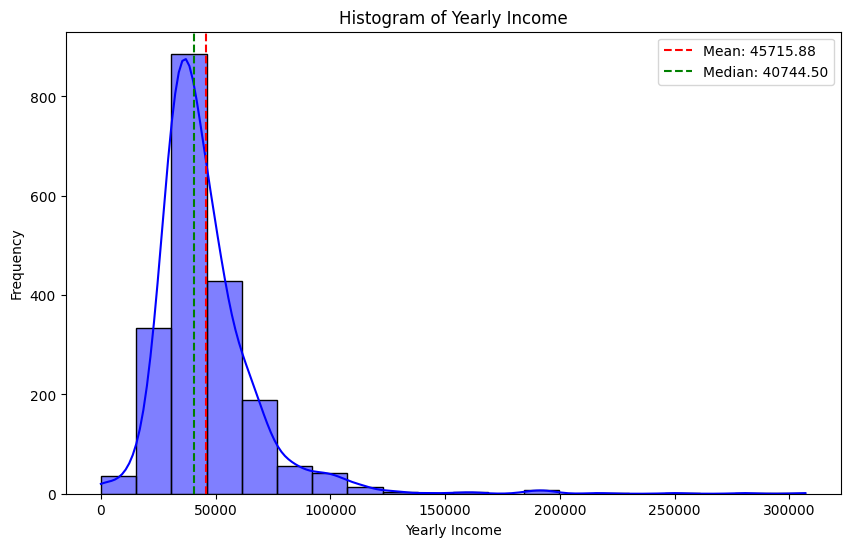

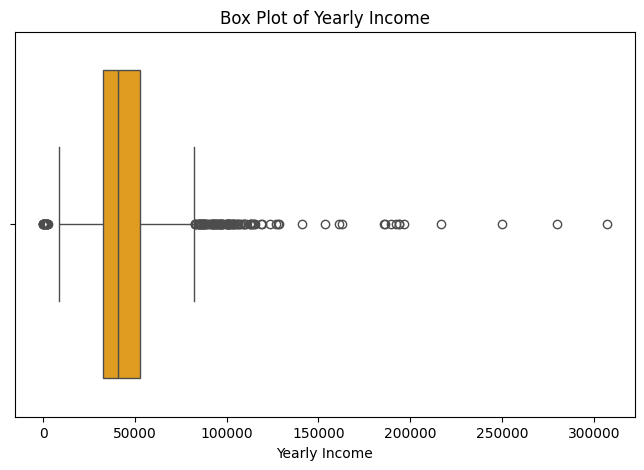

In [9]:

# Extract yearly_income column
yearly_income = data_cleaned['yearly_income']

# Calculate Numerical Insights
mean_income = yearly_income.mean()
median_income = yearly_income.median()
mode_income = yearly_income.mode()[0]
std_dev_income = yearly_income.std()
min_income = yearly_income.min()
max_income = yearly_income.max()
iqr_income = yearly_income.quantile(0.75) - yearly_income.quantile(0.25)

# Print Numerical Insights
print("Numerical Insights for Yearly Income:")
print(f"Mean: {mean_income}")
print(f"Median: {median_income}")
print(f"Mode: {mode_income}")
print(f"Standard Deviation: {std_dev_income}")
print(f"Minimum: {min_income}")
print(f"Maximum: {max_income}")
print(f"IQR: {iqr_income}")

# Plot Histogram
plt.figure(figsize=(10, 6))
sns.histplot(yearly_income, bins=20, kde=True, color='blue')
plt.title('Histogram of Yearly Income')
plt.xlabel('Yearly Income')
plt.ylabel('Frequency')
plt.axvline(mean_income, color='red', linestyle='--', label=f'Mean: {mean_income:.2f}')
plt.axvline(median_income, color='green', linestyle='--', label=f'Median: {median_income:.2f}')
plt.legend()
plt.show()

# Plot Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=yearly_income, color='orange')
plt.title('Box Plot of Yearly Income')
plt.xlabel('Yearly Income')
plt.show()


# yearly_income by Gender and Age Group Analysis

### Gender Analysis
- Observed the same income distribution between genders.

### Age Group Analysis

- Middle Age (35-64) : This group shows the highest income variability and median values, indicating peak earning years.

- Youth (18-24) : This group has low incomes overall but contains notable high-income earners, likely reflecting entrepreneurial individuals or high-paying early careers.

- Retirement Age (65+) : Income declines, but some individuals continue to earn significantly, as seen from the outliers.

### Age Group and Gender Analysis
- Middle-aged groups (25–49) generally have higher incomes
- Older groups (50–64, 65+) show lower medians, likely due to retirement.
- Males tend to have slightly higher median incomes in some age groups, but the overall distribution is similar for both genders. Significant income outliers are present in younger (18–24) and middle-aged groups, indicating some individuals earn exceptionally high amounts.
- Overall, gender differences in income are minor, and age seems to have a more pronounced effect

Numerical Insights by Gender:
                mean   median           std  min       max
gender                                                    
Female  46048.314961  40857.5  24709.174135  1.0  307018.0
Male    45372.638211  40500.0  21081.212529  2.0  216740.0

Numerical Insights by Age Group:
                   mean   median           std     min       max
age_group                                                       
0-17                NaN      NaN           NaN     NaN       NaN
18-24      48358.966997  43875.0  26512.683953  2026.0  307018.0
25-34      47283.991643  42883.0  18006.242860  2365.0  128775.0
35-49      45389.996296  40500.0  18584.906865     3.0  193773.0
50-64      47817.704918  40951.0  27623.505361     4.0  280199.0
65+        39980.578947  39221.0  23848.766521   645.0  103294.0


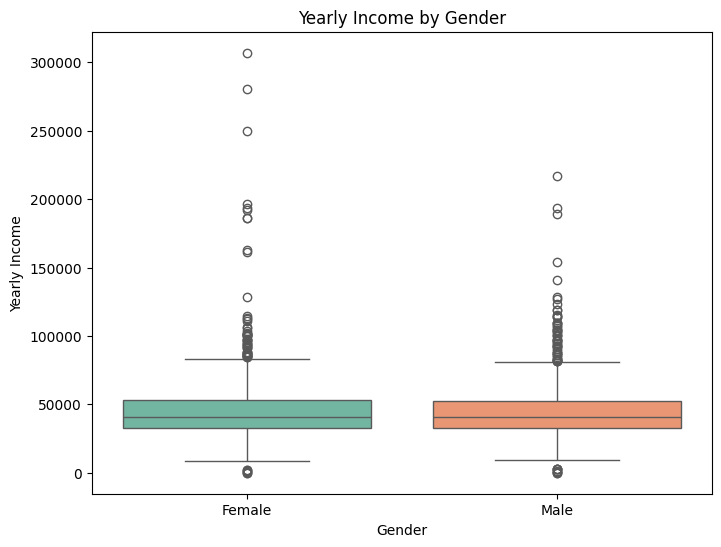

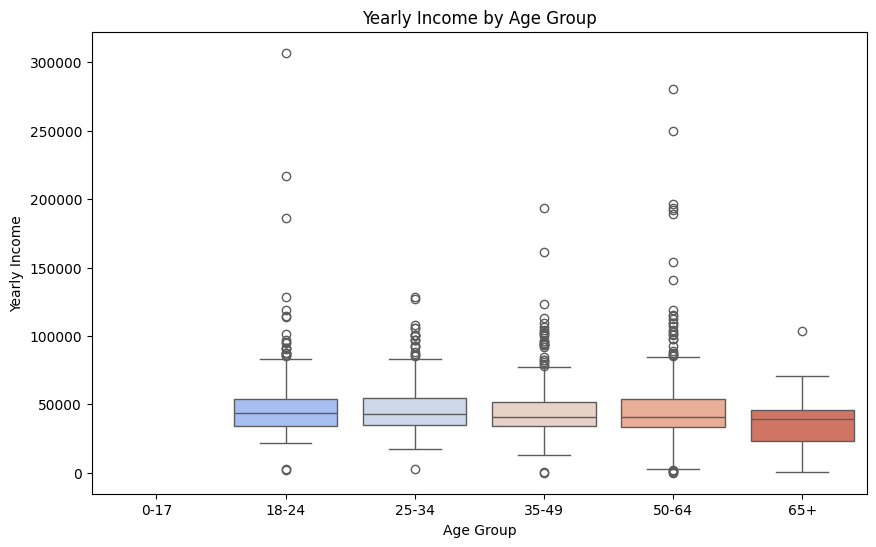

In [10]:
user_data = data_cleaned

# Create age groups (if 'age' column exists)
#bins = [0, 17, 24, 34, 49, 64, 75,100]  # Define age intervals
bins = [0, 17, 24, 34, 49, 64, 65]  # Define age intervals
#labels = ['0-17', '18-24', '25-34', '35-49', '50-64', '65-74','75+']  # Define group labels
labels = ['0-17', '18-24', '25-34', '35-49', '50-64', '65+']  # Define group labels
user_data['age_group'] = pd.cut(user_data['current_age'], bins=bins, labels=labels)
# Assign colors manually to each age group
palette = {'0-17': 'black','18-24': 'blue', '25-34': 'green', '35-49': 'orange', '50-64': 'red','65+': 'white'}

# Numerical Analysis by Gender
print("Numerical Insights by Gender:")
gender_group = user_data.groupby('gender')['yearly_income']
print(gender_group.agg(['mean', 'median', 'std', 'min', 'max']))

# Numerical Analysis by Age Group
print("\nNumerical Insights by Age Group:")
age_group = user_data.groupby('age_group')['yearly_income']
print(age_group.agg(['mean', 'median', 'std', 'min', 'max']))


# Plot Box Plot by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=user_data, x='gender', y='yearly_income', palette='Set2')
plt.title('Yearly Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Yearly Income')
plt.show()

# Plot Box Plot by Age Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_data, x='age_group', y='yearly_income', palette='coolwarm')
plt.title('Yearly Income by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Yearly Income')
plt.show()


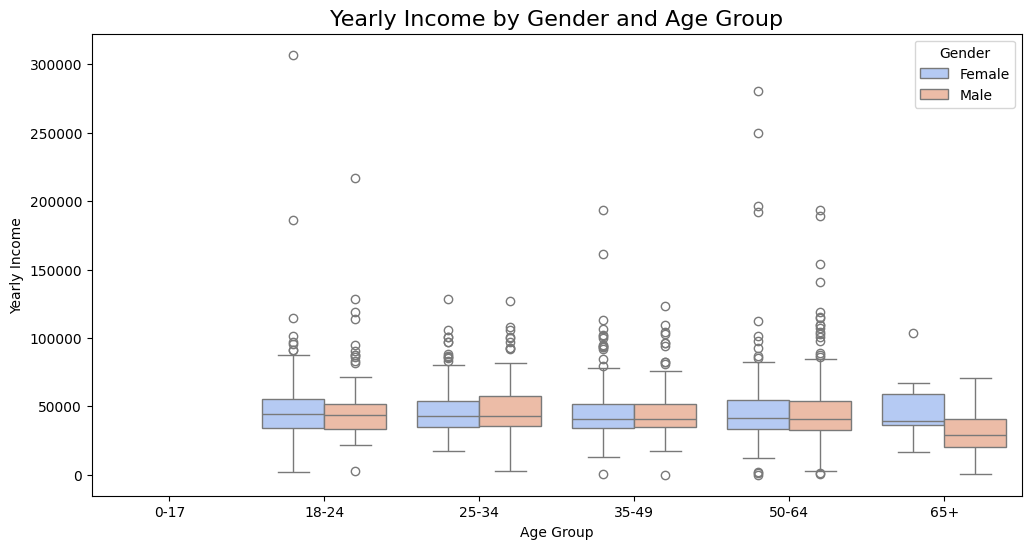

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=user_data,
    x="age_group",
    y="yearly_income",
    hue="gender",
    palette="coolwarm"
)
plt.title("Yearly Income by Gender and Age Group", fontsize=16)
plt.xlabel("Age Group")
plt.ylabel("Yearly Income")
plt.legend(title="Gender")
plt.show()

# Deep Dive into credit_score
### What are the common credit_score ranges? How does the average score look?

### Central Tendency
- The average credit score of 709.73 gives a sense of the typical user score.

### Range
- The minimum (~480) and maximum (~840) values indicate the spread of scores.

### Histogram
- The histogram reveals clusters where most scores are concentrated.


Average Credit Score: 709.73
Minimum Credit Score: 480
Maximum Credit Score: 850


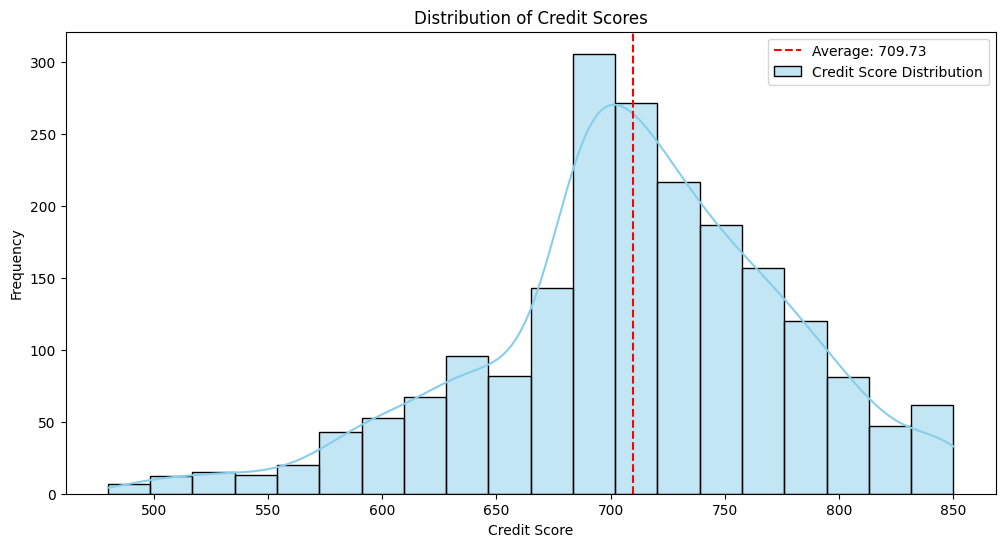

In [12]:
# Function to analyze credit score ranges and calculate the average
def analyze_credit_score(data):
    # Calculate numerical summaries
    avg_credit_score = user_data['credit_score'].mean()
    min_credit_score = user_data['credit_score'].min()
    max_credit_score = user_data['credit_score'].max()

    print(f"Average Credit Score: {avg_credit_score:.2f}")
    print(f"Minimum Credit Score: {min_credit_score}")
    print(f"Maximum Credit Score: {max_credit_score}")

    # Plot the distribution of credit scores
    plt.figure(figsize=(12, 6))

    # Histogram
    sns.histplot(data['credit_score'], kde=True, bins=20, color='skyblue', label='Credit Score Distribution')
    plt.axvline(avg_credit_score, color='red', linestyle='--', label=f'Average: {avg_credit_score:.2f}')
    plt.title('Distribution of Credit Scores')
    plt.xlabel('Credit Score')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Call the function with the users_data
analyze_credit_score(user_data)


### How many users own multiple credit cards? What is the distribution of num_credit_cards?

### Multiple Cards: Users with Multiple Credit Cards
- Total: 1584 users (79.20%) have more than one credit card.

### Trends
- Most users have more than one credit card.


Total Users: 2000
Users with Multiple Credit Cards: 1584 (79.20%)


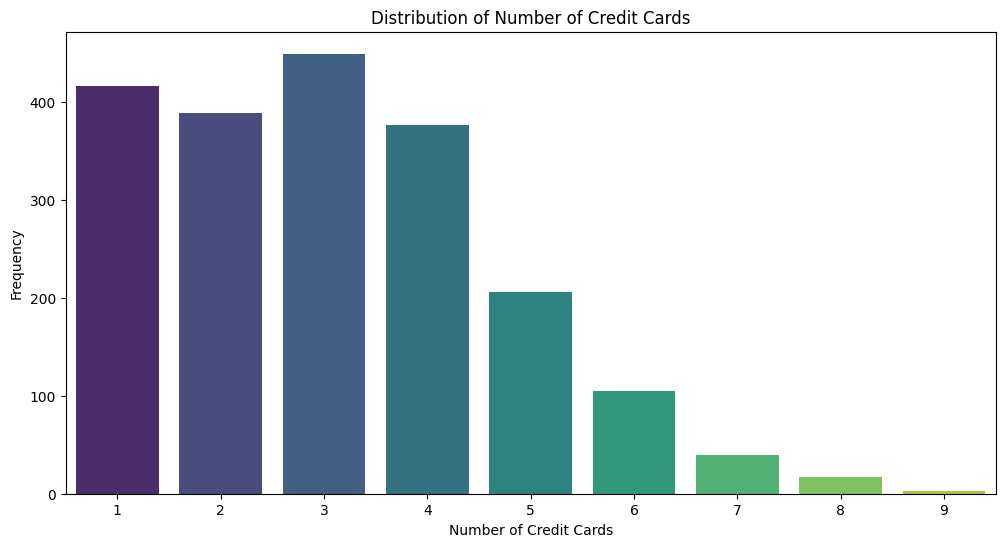

In [13]:

# Function to analyze the distribution of num_credit_cards
def analyze_credit_cards(data):
    # Count users with multiple credit cards
    multiple_card_users = data[data['num_credit_cards'] > 1].shape[0]
    total_users = data.shape[0]
    percentage = (multiple_card_users / total_users) * 100

    print(f"Total Users: {total_users}")
    print(f"Users with Multiple Credit Cards: {multiple_card_users} ({percentage:.2f}%)")
    
    # Distribution of num_credit_cards
    plt.figure(figsize=(12, 6))
    sns.countplot(x=data['num_credit_cards'], palette='viridis')
    plt.title('Distribution of Number of Credit Cards')
    plt.xlabel('Number of Credit Cards')
    plt.ylabel('Frequency')
    plt.show()

# Call the function with the users_data
analyze_credit_cards(user_data)


Number of users who own multiple credit cards: 1584


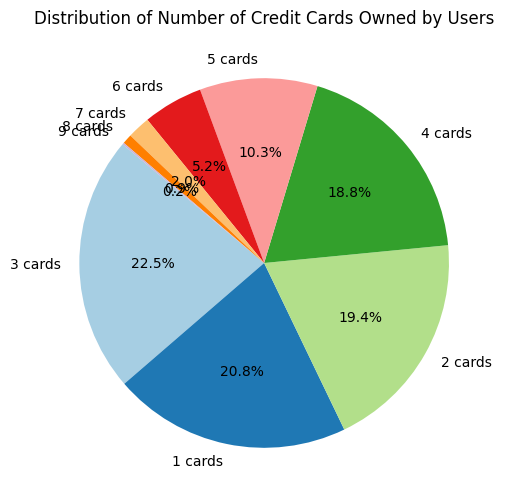

In [14]:
# Step 1: Calculate the number of users who own multiple credit cards
multiple_cards_count = user_data[user_data['num_credit_cards'] > 1].shape[0]
print(f"Number of users who own multiple credit cards: {multiple_cards_count}")

# Step 2: Plot the distribution of num_credit_cards using a pie chart
credit_card_distribution = user_data['num_credit_cards'].value_counts()

# Plotting the pie chart for the distribution
plt.figure(figsize=(8, 6))
plt.pie(
    credit_card_distribution,
    labels=[f"{i} cards" for i in credit_card_distribution.index],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Distribution of Number of Credit Cards Owned by Users")
plt.show()



## Yearly Income vs. Credit Score
- **Question**: How does yearly income vary with credit score? Is there a correlation?

### Correlation Analysis
- **Correlation between Yearly Income and Credit Score**: 0.00
- A correlation of 0.00 between yearly income and credit score indicates no linear relationship between the two variables.
- This suggests that changes in yearly income do not affect the credit score in any predictable way.
- Essentially, income and credit score are unrelated based on this correlation.



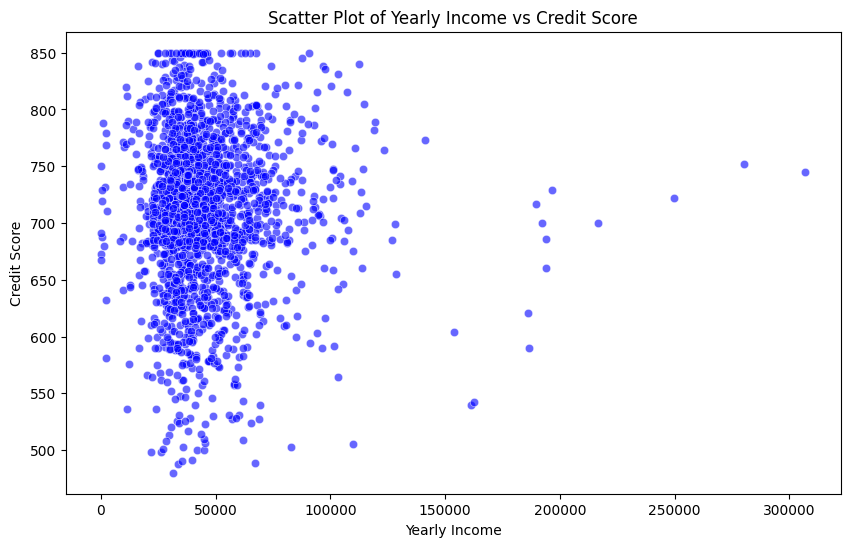

Correlation between Yearly Income and Credit Score: 0.00


In [15]:

# Step 1: Scatter plot to visualize the relationship between yearly_income and credit_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_data, x='yearly_income', y='credit_score', color='blue', alpha=0.6)
plt.title('Scatter Plot of Yearly Income vs Credit Score')
plt.xlabel('Yearly Income')
plt.ylabel('Credit Score')
plt.show()

# Step 2: Calculate the correlation coefficient between yearly_income and credit_score
correlation = user_data[['yearly_income', 'credit_score']].corr().iloc[0, 1]
print(f"Correlation between Yearly Income and Credit Score: {correlation:.2f}")


## Yearly Income vs. Credit Score
- **Question**: Are total_debt and credit_score related? Are high debts associated with lower scores?

### Correlation Analysis
- **Correlation between Yearly Income and Credit Score**: -0.10 indicates a **weak negative relationship**
- While there may be a slight trend suggesting that users with **higher debts** might have **slightly lower credit scores**, the relationship is weak.
This implies that other factors likely play a larger role in determining the credit score, and **debt alone doesn’t significantly affect it**.


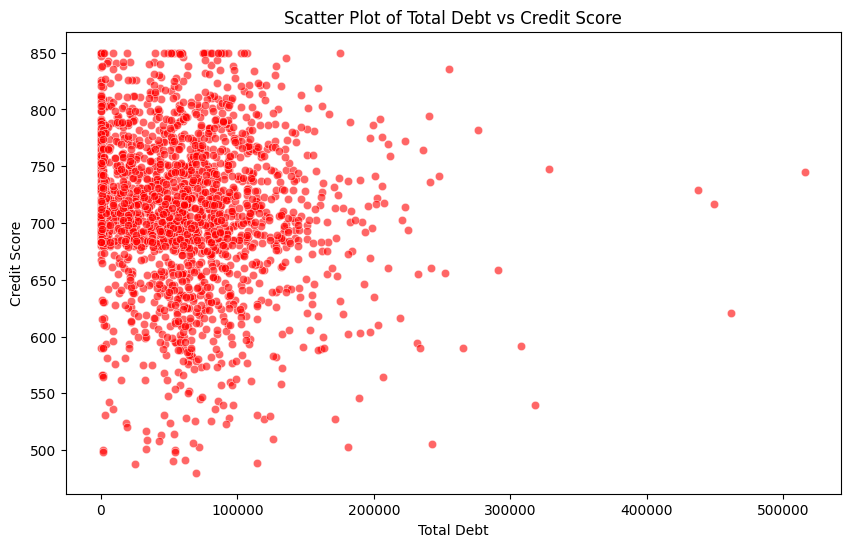

Correlation between Total Debt and Credit Score: -0.10


In [16]:
# Step 1: Scatter plot to visualize the relationship between total_debt and credit_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_data, x='total_debt', y='credit_score', color='red', alpha=0.6)
plt.title('Scatter Plot of Total Debt vs Credit Score')
plt.xlabel('Total Debt')
plt.ylabel('Credit Score')
plt.show()

# Step 2: Calculate the correlation coefficient between total_debt and credit_score
correlation_debt_credit = user_data[['total_debt', 'credit_score']].corr().iloc[0, 1]
print(f"Correlation between Total Debt and Credit Score: {correlation_debt_credit:.2f}")



## credit_cards vs. gender
- **Question**: Does gender influence the number of credit cards owned?

### Static Test Analysis
- Mann-Whitney U test statistic: 498811.0, p-value: 0.9333473368284791
- There is no statistically significant difference between the number of credit cards owned by males and females.



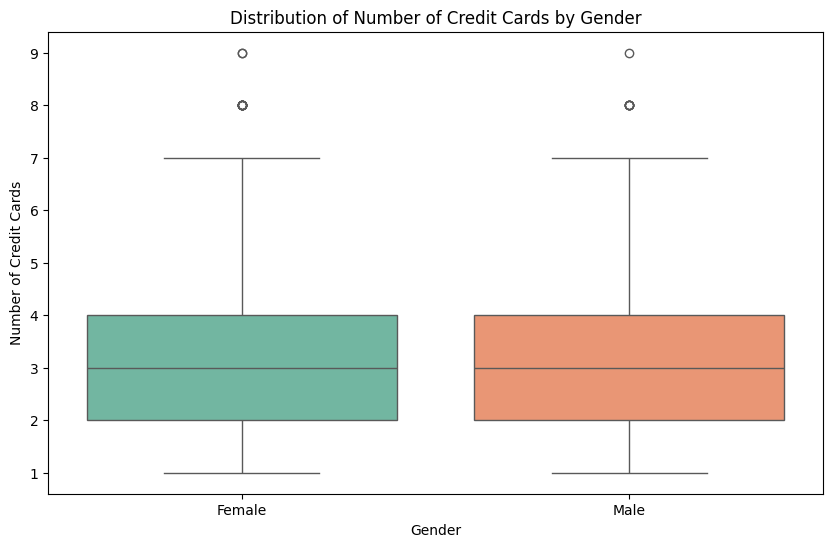

Mann-Whitney U test statistic: 498811.0, p-value: 0.9333473368284791
There is no statistically significant difference between the number of credit cards owned by males and females.


In [17]:
# Step 1: Box plot to visualize the distribution of num_credit_cards by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=user_data, x='gender', y='num_credit_cards', palette='Set2')
plt.title('Distribution of Number of Credit Cards by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Credit Cards')
plt.show()

# Step 2: Statistical Test (Mann-Whitney U test) to compare the distributions
# First, we check if the data is normally distributed
gender_groups = user_data.groupby('gender')['num_credit_cards']

# Perform Mann-Whitney U test between male and female
# If more than two groups exist, you can perform ANOVA instead
male_credit_cards = gender_groups.get_group('Male').dropna()
female_credit_cards = gender_groups.get_group('Female').dropna()

# Perform the test
stat, p_value = stats.mannwhitneyu(male_credit_cards, female_credit_cards)
print(f"Mann-Whitney U test statistic: {stat}, p-value: {p_value}")

# Interpretation:
if p_value < 0.05:
    print("There is a statistically significant difference between the number of credit cards owned by males and females.")
else:
    print("There is no statistically significant difference between the number of credit cards owned by males and females.")
